# Funciones teóricas de densidas de probabilidad

1. Variables aleatorias x: números reales, r: enteros
2. Parámetros: $\theta$
3. Función de densidad de probabilidad: $f(x;\theta)$ o $f(x|\theta)$

## Distribucion gaussiana o normal

$f(x;\mu,\sigma) = \frac{1}{{\sigma\sqrt{2\pi}}}e^{-\frac{\left(x-\mu\right) ^2}{2\sigma^2}}$

1. Dos parámetros, $\mu$: valor medio, $\sigma$: desviación estándar

### Producto de dos gaussianas:

$f(x,y;\mu_x, mu_y,\sigma_x, \sigma_y) = \frac{1}{{\sigma_x \sigma_y 2\pi}}e^{-\frac{1}{2}\left(\frac{(x-\mu_x)^2}{\sigma_x^2}+\frac{(y-\mu_y)^2}{\sigma_y^2}\right)}$

1. Correlación $\rho=\frac{cov[x,y]}{\sigma_x \sigma_y}$, pero la matriz de covarianza se puede escibir como $E[x,y]-E[x]E[y]=V_{x,y}$, entonces $\rho=\frac{V_{x,y}}{\sigma_x\sigma_y}$ y 

$f(x;\mu,V)=\frac{1}{(2\pi)^{N/2}|V|}e^{-\frac{1}{2}\left((x-\mu)^T V^{-1}(x-\mu)\right)}$

### Función de error

Probabilidad de que una variable aleatoria caiga dentro del rango de $1\sigma$

$erf(\gamma)=\frac{2}{\sqrt{\pi}}\int_0^\gamma e^{-x^2}dx=1= 68\%$

Para considerar un nuevo descubrimineto como correcto tiene que estar dento de $5\sigma$ que es un p-valor=$5.7 x10^{-7}$

In [ ]:
TCanvas * c1= new TCanvas("c1", "pdf",5,5,800,500); 
TH1F * h1 = new TH1F("Distribucion Gaussiana", ";x;f(x)", 100, -3. ,3. );
r3 = new TRandom3();
for (int i = 0; i < 1000000; ++i)
    h1->Fill(r3->Gaus());
h1->Fit("gaus");
gStyle->SetOptFit();
h1->Draw();
c1->Draw();

## Distribución de Poisson

$f(n;\nu)=\frac{\nu^n}{n!}e^{-\nu}$ 

1. $n$ discreto; $\nu$ continua
2. Describe la probabilidad de que $n$ eventos sucedan, cuando la probabilidad de expectación es $\nu$
3. Su desviación estándar es $\sigma=\sqrt{\nu}$
4. Funciona mejor mientras mas grande sea $n$

In [ ]:
TCanvas * c2= new TCanvas("c2", "pdf",5,5,800,500); 
TH1F * h2 = new TH1F("Distribucion de Poisson", ";x;f(x)", 100, 0. ,20. );
for (int i = 0; i < 100000; ++i)
    h2->Fill(r3->Poisson(10));

TF1* fit2 = new TF1("fit2","[0] * TMath::Poisson(x, [1])",0,20);
gStyle->SetOptFit();
fit2->SetParameters(h2->GetMaximum(),h2->GetMean());
h2->Fit("fit2", "R");
h2->Draw();
c2->Draw();

## Distribución binomial
$f(r;N,p) = \frac{N!}{r!(N-r)!}p^r(1-p)^{n-r}$

1. $\binom{N}{r}=\frac{N!}{r!(N-r)!}$ combinaciones de N en r; $q=1-p$
2. Probabilidad de tener $r$ casos acertados de $N$ eventos, dada una probabilidad intrínseca de $p$
3. Desviación estrndar $\sigma=\sqrt{Npq}$
4. Cuando $p$ es muy grande, se aproxima a la distribución de Poisson
5. Cuando $p$ es muy grande y $N$ también es muy grande, se aproxima a una distribución gaussiana
6. Si existen varias proabilidades intrínsecas $p_n={p_1,p_2,...p_n}$ entonce la distibución binomial es:

$f(r_i;N,p_i)=\frac{N!}{\prod r_i!}\prod p_i^{r_i}$

In [ ]:
TCanvas * c3= new TCanvas("c3", "pdf",5,5,800,500); 
c3->SetLogy();
TH1F * h3 = new TH1F("Distribucion Binomial", ";x;f(x)", 100, 0. ,100. );
for (int i = 0; i < 1000; ++i)
    h3->Fill(r3->Binomial(100,.01));
    
TF1 *f3 = new TF1("f3", "[0]*TMath::Binomial([1], x) * ([2])^x * (1-[2])^([1]-x)", 0, 100);
gStyle->SetOptFit();
f3->SetParameter(0, 10000);
f3->SetParameter(1, 2000);
f3->SetParameter(2, 0.01);
f3->SetNpx(100);
h3->Fit("f3", "R");
h3->Draw();
c3->Draw();

##  Distribución de Breit-Wigner (Cauchy)

$f(E;M,\Gamma) =\frac{1}{2\pi} \frac{\Gamma}{(E-M)^2+(\Gamma/2)^2}$

1. Variación de la energía de la sección eficaz de producida en la formación de un estado con masa $M$ y anchura $\Gamma$ 
2. Si $x=\frac{E-M}{\Gamma/2}$ entonces $f(x)=\frac{1}{\pi}\frac{1}{1+x^2}$ (Cauchy)


In [ ]:
TCanvas * c4= new TCanvas("c4", "pdf",5,5,800,500); 
TH1F * h4 = new TH1F("Distribucion de BW", ";x;f(x)", 100, -100 ,100. );
for (int i = 0; i < 1000; ++i)
    h4->Fill(r3->BreitWigner(0,25));

//TF1* fit4 = new TF1("fit4","TMath::BreitWigner(x[0])",-100,100);
gStyle->SetOptFit();
h4->Draw();
c4->Draw();

## Distribución de Landau
$f(\lambda)=\frac{1}{\pi}\int_0^\infty e^{-u ln u -\lambda u} \sin(\pi u)du$

1. Distribución de probabilidad de la pérdida de energía de una partícula cargada en presencia de un campo electromagnético.
2. $\Delta$ es la energía pérdida a partir de una energía inicial $\Delta_0$
3. El pico de la distribución se encuentra en $\lambda=\Delta-\Delta_0/\xi$, donde $\xi$ es una escala que depende del material.

In [ ]:
TCanvas * c5= new TCanvas("c5", "pdf",5,5,800,500); 
c5->SetLogy();
TH1F * h5 = new TH1F("Distribucion de Landau", ";x;f(x)", 100, 0. ,100. );
for (int i = 0; i < 10000; ++i)
    h5->Fill(r3->Landau());
h5->Fit("landau");
gStyle->SetOptFit();
h5->Draw();
c5->Draw();

## Distribución binomial negativa
$f(r;k,p) = \frac{(k+r-1)!}{r!(k-1)!}q^k p^r$

1. Probabilidad de que $r$ casos acertados en $N$ permutaciones, antes de tener $k$ casos erroneos
2. Permutaciones: $\binom{-k}{r}=(-1)\frac{(k+r-1)!}{r!(k-1)!}$
3. Casoos erroneos $q=1-p$
4. Valor medio $\nu=\frac{p}{q}k$ y la varianza $V=\frac{p}{q^2}$
5. Para $p$ muy grande, $k$ muy pequeña y $\mu=pk$ la distribución binomial negativa se aproxima a una distribución de Poisson

In [ ]:
TCanvas * c6= new TCanvas("c6", "pdf",5,5,800,500); 
//c6->SetLogy();
TFile f ("nbd_test.root"); 

ntuple1->Draw("N41 >> h1","nch>=320 && nch<=430");
TF1* fit6 = new TF1("fit6","[0]*(TMath::Gamma(x+[1])/(TMath::Gamma(x+1)*TMath::Gamma([1])))*(TMath::Power(([2]/[1]),x))*(TMath::Power((1+([2]/[1]))\
,-x-[1]))");
//TF1* fit6 = new TF1("fit2","[0]*(TMath::Gamma(x+[1])/(TMath::Gamma(x+1)*TMath::Gamma([1])))*(TMath::Power(([2]/[1]),x))*(TMath::Pow\
er((1+([2]/[1])),-x-[1]))");
fit6->SetParameter(0,1);// normalization constant                                                                                  
fit6->SetParameter(1,20); // k parameter                                                                                            
fit6->SetParameter(2,32.);  // mean multiplicity                                                                                    
h1->Fit("fit6","R");
c6->Draw();

## Distribución de Student

$f(t;n)=\frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})}(1+\frac{t^2}{2})^{\frac{n+1}{2}}$

1. $t=\frac{x-\mu}{\sigma}$ 
2. Para n muy grande la distribución de Studen se aproxima a una distribución gaussiana
3. Para n muy chicas, el ancho de la districución aumenta

In [ ]:
// file /root-6.20.06/tutorials/math/tStudent.C
int n=100;
   double a=-5.;
   double b=5.;
   //double r  = 3;
   TF1* pdf = new TF1("pdf", "ROOT::Math::tdistribution_pdf(x,3.0)", a,b);
   TF1* cum = new TF1("cum", "ROOT::Math::tdistribution_cdf(x,3.0)", a,b);
 TH1D* quant = new TH1D("quant", "", 9, 0, 0.9);

   for(int i=1; i < 10; i++)
      quant->Fill((i-0.5)/10.0, ROOT::Math::tdistribution_quantile((1.0*i)/10, 3.0 ) );

   double xx[10];
   xx[0] = -1.5;
   for(int i=1; i<9; i++)
      xx[i]= quant->GetBinContent(i);
   xx[9] = 1.5;
   TH1D* pdfq[10];
   //int nbin = n/10.0;
   for(int i=0; i < 9; i++) {
      int nbin = n * (xx[i+1]-xx[i])/3.0 + 1.0;
      TString name = "pdf";
      name += i;
      pdfq[i]= new TH1D(name, "", nbin,xx[i],xx[i+1] );
      for(int j=1; j<nbin; j++) {
         double x= j*(xx[i+1]-xx[i])/nbin + xx[i];
         pdfq[i]->SetBinContent(j, ROOT::Math::tdistribution_pdf(x,3));
      }
   }
 TCanvas *Canvas = new TCanvas("DistCanvas", "Student Distribution graphs", 10, 10, 800, 700);
   pdf->SetTitle("Student t distribution function");
   cum->SetTitle("Cumulative for Student t");
   quant->SetTitle("10-quantiles  for Student t");
   Canvas->Divide(2, 2);
   Canvas->cd(1);
   pdf->SetLineWidth(2);
   pdf->DrawCopy();
   Canvas->cd(2);
   cum->SetLineWidth(2);
   cum->SetLineColor(kRed);
   cum->Draw();
   Canvas->cd(3);
   quant->Draw();
   quant->SetLineWidth(2);
   quant->SetLineColor(kBlue);
   quant->SetStats(0);
   Canvas->cd(4);
   pdfq[0]->SetTitle("Student t & its quantiles");
   pdf->SetTitle("");
   pdf->Draw();
   //pdfq[0]->SetAxisRange(-1.5, 0, 1.5,1.0);
   pdfq[0]->SetTitle("Student t & its quantiles");
   for(int i=0; i < 9; i++) {
      pdfq[i]->SetStats(0);
      pdfq[i]->SetFillColor(i+1);
      pdfq[i]->Draw("same");
   }
   Canvas->Modified();
   Canvas->cd();
   Canvas->Draw();

## Distribución $\chi^2$

La desviación cuadrática media de una función $g(x)$ y $n$ mediciones de ${(x_i,y_i)}$ es:

$\chi^2=\sum_{i=1}^{n}\left(\frac{\gamma_i - g(x_i)}{\sigma_i}\right)^2$

donde $\sigma_i$ es el error gaussiano de la i-ésima medición.

Cada término contribuye al error, por lo que $E[f(\chi^2;n)]=n$ donde $\sigma=\sqrt{2n}$ y $f(\chi^2;n)$ es la distribución $\chi^2$:

$f(\chi^2;n)=\frac{2^{-n/2}}{\Gamma(n/2)}\chi^{n-2}e^{-\chi^2/2}$

1. $\chi^2$ nos dice si las mediciones son comparables con el modelo
2. Grados de libertad: n-$\theta$ donde $\theta$ es el número de parámetros del ajuste



In [1]:
// file /root-6.20.06/tutorials/math/chi2test.C
TCanvas * chi2test(Float_t w=0)
{
   // Note: The parameter w is used to produce the 2 pictures in
   // the TH1::Chi2Test method. The 1st picture is produced with
   // w=0 and the 2nd with w=17 (see TH1::Chi2Test() help).

   // Define Histograms.
   const Int_t n = 20;

   TH1D *h1 = new TH1D("h1", "h1", n, 4, 16);
   TH1D *h2 = new TH1D("h2", "h2", n, 4, 16);

   h1->SetTitle("Unweighted Histogram");
   h2->SetTitle("Weighted Histogram");

   h1->SetBinContent(1, 0);
   h1->SetBinContent(2, 1);
   h1->SetBinContent(3, 0);
   h1->SetBinContent(4, 1);
   h1->SetBinContent(5, 1);
   h1->SetBinContent(6, 6);
   h1->SetBinContent(7, 7);
   h1->SetBinContent(8, 2);
   h1->SetBinContent(9, 22);
   h1->SetBinContent(10, 30);
   h1->SetBinContent(11, 27);
   h1->SetBinContent(12, 20);
   h1->SetBinContent(13, 13);
   h1->SetBinContent(14, 9);
   h1->SetBinContent(15, 9 + w);
   h1->SetBinContent(16, 13);
   h1->SetBinContent(17, 19);
   h1->SetBinContent(18, 11);
   h1->SetBinContent(19, 9);
   h1->SetBinContent(20, 0);

   h2->SetBinContent(1, 2.20173025 );
   h2->SetBinContent(2, 3.30143857);
   h2->SetBinContent(3, 2.5892849);
   h2->SetBinContent(4, 2.99990201);
   h2->SetBinContent(5, 4.92877054);
   h2->SetBinContent(6, 8.33036995);
   h2->SetBinContent(7, 6.95084763);
   h2->SetBinContent(8, 15.206357);
   h2->SetBinContent(9, 23.9236012);
   h2->SetBinContent(10, 44.3848114);
   h2->SetBinContent(11, 49.4465599);
   h2->SetBinContent(12, 25.1868858);
   h2->SetBinContent(13, 16.3129692);
   h2->SetBinContent(14, 13.0289612);
   h2->SetBinContent(15, 16.7857609);
   h2->SetBinContent(16, 22.9914703);
   h2->SetBinContent(17, 30.5279255);
   h2->SetBinContent(18, 12.5252123);
   h2->SetBinContent(19, 16.4104557);
   h2->SetBinContent(20, 7.86067867);
   h2->SetBinError(1, 0.38974303 );
   h2->SetBinError(2, 0.536510944);
   h2->SetBinError(3, 0.529702604);
   h2->SetBinError(4, 0.642001867);
   h2->SetBinError(5, 0.969341516);
   h2->SetBinError(6, 1.47611344);
   h2->SetBinError(7, 1.69797957);
   h2->SetBinError(8, 3.28577447);
   h2->SetBinError(9, 5.40784931);
   h2->SetBinError(10, 9.10106468);
   h2->SetBinError(11, 9.73541737);
   h2->SetBinError(12, 5.55019951);
   h2->SetBinError(13, 3.57914758);
   h2->SetBinError(14, 2.77877331);
   h2->SetBinError(15, 3.23697519);
   h2->SetBinError(16, 4.3608489);
   h2->SetBinError(17, 5.77172089);
   h2->SetBinError(18, 3.38666105);
   h2->SetBinError(19, 2.98861837);
   h2->SetBinError(20, 1.58402085);

   h1->SetEntries(217);
   h2->SetEntries(500);

   //apply the chi2 test and retrieve the residuals
   Double_t res[n], x[20];
   h1->Chi2Test(h2,"UW P",res);

   //Graph for Residuals
   for (Int_t i=0; i<n; i++) x[i]= 4.+i*12./20.+12./40.;
   TGraph *resgr = new TGraph(n,x,res);
   resgr->GetXaxis()->SetRangeUser(4,16);
   resgr->GetYaxis()->SetRangeUser(-3.5,3.5);
   resgr->GetYaxis()->SetTitle("Normalized Residuals");
   resgr->SetMarkerStyle(21);
   resgr->SetMarkerColor(2);
   resgr->SetMarkerSize(.9);
   resgr->SetTitle("Normalized Residuals");

   //Quantile-Quantile plot
   TF1 *f = new TF1("f","TMath::Gaus(x,0,1)",-10,10);
   TGraphQQ *qqplot = new TGraphQQ(n,res,f);
   qqplot->SetMarkerStyle(20);
   qqplot->SetMarkerColor(2);
   qqplot->SetMarkerSize(.9);
   qqplot->SetTitle("Q-Q plot of Normalized Residuals");

   //create Canvas
   TCanvas *c1 = new TCanvas("c1","Chistat Plot",10,10,700,600);
   c1->Divide(2,2);

   // Draw Histogramms and Graphs
   c1->cd(1);
   h1->SetMarkerColor(4);
   h1->SetMarkerStyle(20);

   h1->Draw("E");

   c1->cd(2);
   h2->Draw("");
   h2->SetMarkerColor(4);
   h2->SetMarkerStyle(20);

   c1->cd(3);
   gPad->SetGridy();
   resgr->Draw("APL");

   c1->cd(4);
   qqplot->Draw("AP");
    
    c1->cd(0);
    c1->Draw();
    c1->Update();
   return c1;

       
}


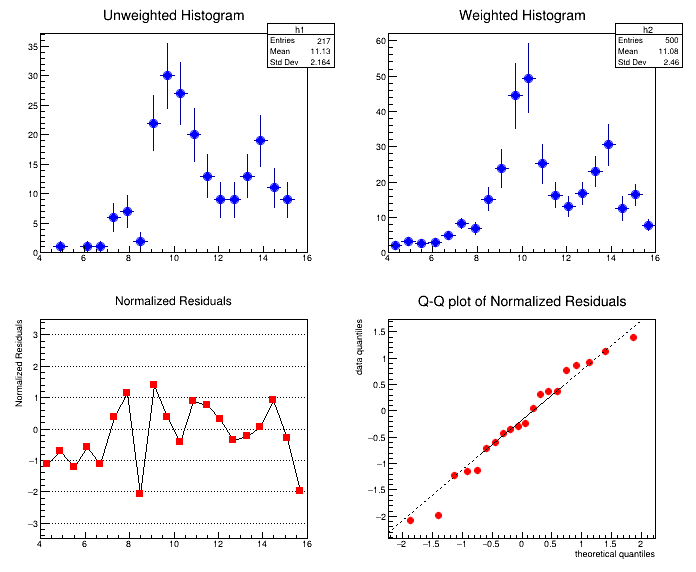

Chi2 = 21.085124, Prob = 0.332116, NDF = 19, igood = 1
(TCanvas *) 0x7fa3708b0540


Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 1 event.



In [2]:
chi2test()

In [3]:
#include <cmath>
#include <limits>
#include <random>

double generateGaussianNoise(double mu, double sigma)
{
	constexpr double epsilon = std::numeric_limits<double>::epsilon();
	constexpr double two_pi = 2.0 * M_PI;

        static std::mt19937 rng(std::random_device{}()); // Standard mersenne_twister_engine seeded with rd()
        static std::uniform_real_distribution<> runif(0.0, 1.0);

	double u1, u2;
	do
	{
		u1 = runif(rng);
		u2 = runif(rng);
	}
	while (u1 <= epsilon);

	auto z0 = sqrt(-2.0 * log(u1)) * cos(two_pi * u2);
	// auto z1 = sqrt(-2.0 * log(u1)) * sin(two_pi * u2); // not used here!

	return z0 * sigma + mu;
}

In [4]:
generateGaussianNoise(0,10)

(double) -4.9328862
